## Exercise 12.2

This exercise consists of creating a Convolutional Neural Network (**CNN**) which is trained to recongize digits from 0 to 9 using the MNIST dataset, the same as **Exercise 12.1**.

#### Neural Network architecture
Starting from the advices given, I chose to use the following structure:
1. the first **Convolutional2D** layer with 10 filters, a 5x5 pixels kernel and a ReLU activation function,
2. the first **MaxPooling2D** layer with a 2x2 pixels pool size, and the stride $s = 2$,
3. the second **Convolutional2D** layer with 20 filters, a 5x5 pixels kernel and a ReLU activation function,
4. the second **MaxPooling2D** layer equal to the first one,
5. a **Flatten** layer to feed the following **Dense** layer which needs an array as input,
6. a **Dense** layer of 200 neurons, in order to increase representativeness, with actiovation function ReLU,
6. a **Dropout** layer with drop rate of 50 %, to avoid the overfitting of the parameters, and prevent the DNN from learning the data,
7. a final **Dense** layer with actiovation function Soft Max, which allows a categorical output.

I decided to train the Network for at least 10 epochs, I also tried with 20 epochs and the results have improved significally. I used some bad written digits (*/dataEx2/5t.png* which is a tilted 5 and */dataEx2/5b.png* which is a bad written 5, very similiar to a 3) as benchmarks, after 10 epochs the **CNN** did not recognize the two digits, but after 20 epoch, the result is better, it will follow a better explenation below.

#### Data reshape
The given data are made of two arrays of 70000 components each, divided in traing (60000) and validation (10000). The first one is an array of 28 x 28 pixels images with white digits onto a black background, and the second one is an array of 60000 components containing the labels of the images.
A reshape of both inputs is needed to perform a categorical training using a Deep Neural Network:
* X reshape: in order to "feed" the **CNN**, each image contained in the data array needs to be reshaped onto itself, but it is important to know whether the convolutional layer accepts *channel first* or not, in this case the channel had to be at the end of the input array,
* Y reshape: in order to train the Deep Neural Network to provide a categorical output, the labels need to be set to categorical in order to use categorical crossentropy as loss to train the Network.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# setup random number generators
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# image properties
img_x, img_y = 28, 28
# number of categories
num_class = 10

Data loading
x_t shape: (60000, 28, 28)
y_t shape: (60000, 10)
y_v shape: (10000, 10)


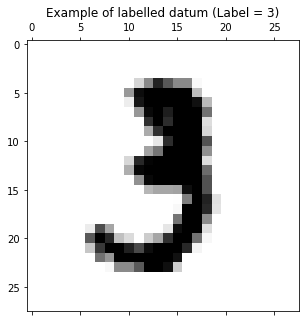

In [2]:
# the data, split between train and test sets
(x_t, y_t), (x_v, y_v) = mnist.load_data()
print("Data loading")
print("x_t shape:", x_t.shape)

# convert class vectors to binary class matrices (to use categorical_crossentropy)
y_t = tf.keras.utils.to_categorical(y_t, num_class)
y_v = tf.keras.utils.to_categorical(y_v, num_class)
print("y_t shape:", y_t.shape)
print("y_v shape:", y_v.shape)

# example of data
fig, ax = plt.subplots(ncols = 1, figsize=[5, 5])
ax.set_title(r"Example of labelled datum (Label = " + str(np.argmax(y_t[10])) + ")")
ax.matshow(x_t[10,:], cmap='binary')
plt.show()

In [3]:
# Setting up neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if tf.keras.backend.image_data_format() == 'channels_first':
    x_t = x_t.reshape(x_t.shape[0], 1, img_x, img_y)
    x_v = x_v.reshape(x_v.shape[0], 1, img_x, img_y)
    input_shape = (1, img_x, img_y)
    print("Input shape = " + str(input_shape))
    
else:
    x_t = x_t.reshape(x_t.shape[0], img_x, img_y, 1)
    x_v = x_v.reshape(x_v.shape[0], img_x, img_y, 1)
    input_shape = (img_x, img_y, 1)
    print("Input shape = " + str(input_shape))

def CreateCNN():
    # model
    model = Sequential()
    # convolutional 2D layer
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # max pooling layer
    model.add(MaxPooling2D(2, 2))
    # convolutional 2D layer
    model.add(Conv2D(20, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    # max pooling layer
    model.add(MaxPooling2D(2, 2))
    # dense layer
    model.add(Flatten())
    # dense layer
    model.add(Dense(200, activation="relu"))
    # dropout layer
    model.add(Dropout(0.5))
    # softmax layer (categorical)
    model.add(Dense(num_class, activation="softmax"))
    return model

print("Model created successfully")

Input shape = (28, 28, 1)
Model created successfully


In [11]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def CompileModel():
    # create the model
    model = CreateCNN()
    # compile the model
    model.compile(loss = tf.keras.losses.categorical_crossentropy,
                  optimizer = Adam(), metrics=["acc"])
    return model

print("Model compiled successfully")

Model compiled successfully


In [12]:
# training parameters
bsize = 60
nepoc = 20

model_CNN = CompileModel()
model_CNN.summary()

# train model
history = model_CNN.fit(x_t, y_t, batch_size = bsize,
                        epochs = nepoc, validation_data=(x_v, y_v), shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 20)          5020      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 320)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               64200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)              

The following two plots represent the loss and the accuracy of the trained **CNN**, the trend of both training and validation ones are fine, in particular the validation loss and accuracy are immediately very good, in other words loss is very low and accuracy is circa 1, already in the first few epochs. Then, while the training metrics grows sharply, the validation metrics increase very slowly, in the end training and validation metrics are pretty much the same.

313/313 [==============================] - 0s 1ms/step - loss: 0.0478 - acc: 0.9888

Test loss = [0.047816626727581024, 0.9887999892234802]


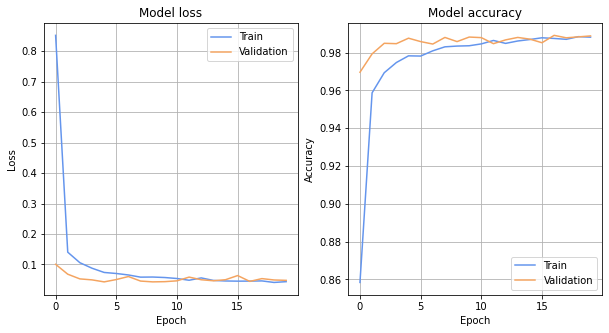

In [13]:
# model evaluation
score = model_CNN.evaluate(x_v, y_v)

# print performance
print()
print("Test loss =", score)

fig = plt.figure(figsize=[10, 5])

# summarize history for loss
fig.add_subplot(1, 2, 1)
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.plot(history.history["loss"], color="cornflowerblue")
plt.plot(history.history["val_loss"], color="sandybrown")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()
# summarize history for accuracy
fig.add_subplot(1, 2, 2)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(history.history["acc"], color="cornflowerblue")
plt.plot(history.history["val_acc"], color="sandybrown")
plt.legend(["Train", "Validation"], loc="best")
plt.grid()

plt.show()

### Digit recognition

The image plot below represents the input data and it's title contains the prediction made using the model.

The scatter plot below represents the output of the final **Dense** layer of the **CNN** with the softmax activation function, which can be interpreted as the "recognition probabiltity" of the digit by the model, the predicted digit is the one with the hishest probability.

Note 1: the most expressive test is the one that involves */dataEx2/5b.png*, indeed, the digit as comparable probabilities to be a 3 or a 5, expressing the same problem shown in **Exercise 12.1**, \
Note 2: trainig the **CNN** for 10 epochs did not allow to recognize tilted digits, but increasing the training epochs to 20 allowed to predict the correct result for a tilted digit (*/dataEx2/5t.png*).

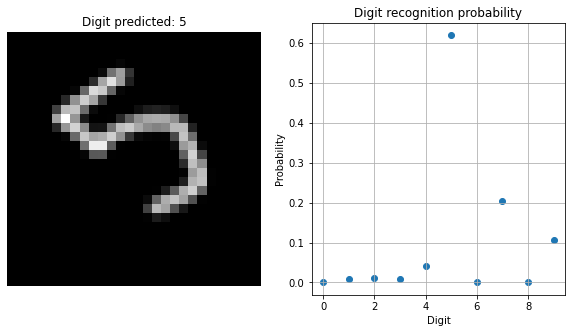

In [16]:
from PIL import Image
import matplotlib.image as image

digit_filename = "./dataEx2/5t.png"
digit_in = Image.open(digit_filename).convert('L')

pix = digit_in.load();
data = np.zeros([img_x, img_y])
for j in range(img_y):
    for i in range(img_x):
        data[i,j]=pix[j,i]


# reshape data & prediction
data = data.reshape(1, img_x, img_y, 1)
pred = model_CNN.predict(data)

# plot
# reshape to be plotted (imshow)
data = data.reshape(img_x, img_y)
fig = plt.figure(figsize=[10, 5])
# digit plot
plt.subplot(1, 2, 1)
plt.title("Digit predicted: {}".format(np.argmax(pred)))
plt.imshow(data, cmap='gray')    
plt.axis("off")
# probability plot
plt.subplot(1, 2, 2)
plt.scatter(np.arange(10), pred)
plt.title("Digit recognition probability")
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.grid()
plt.show()

In [8]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 flatten
5 dense
6 dropout
7 dense_1


(5, 5, 1, 10)


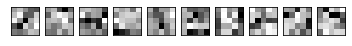

In [9]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()